In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from random import random

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
md_path = "data/mouse_drug_data.csv"
td_path = "data/clinicaltrial_data.csv"
# Read the Mouse and Drug Data and the Clinical Trial Data

md = pd.read_csv(md_path)
td = pd.read_csv(td_path)
# Combine the data into a single dataset
merge = pd.merge(md, td, on="Mouse ID", how="left")


# Display the data table for preview
merge.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
DT=merge.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
DT.head()

# Convert to DataFrame

# Preview DataFrame



Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [3]:
DTU=DT.unstack(0)
DTU

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

DTSEM=merge.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']

# # Convert to DataFrame
DTSEM=DTSEM.unstack(0)
# # Preview DataFrame
DTSEM.head()
yerrcap=DTSEM["Capomulin"]
yerrinf=DTSEM["Infubinol"]
yerrket=DTSEM["Ketapril"]
yerrpla=DTSEM["Placebo"]
DTSEM.reset_index()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


In [5]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [6]:
DT.head()

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [7]:
Drugs=DTU.reset_index()
Drugs
# for Timepoint in DT
#     Capomulin.append(DT.["Capomulin"])

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


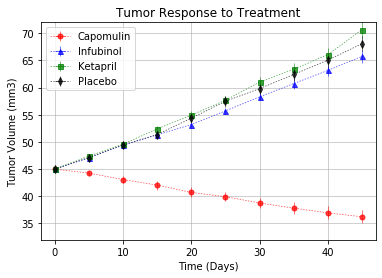

In [8]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 47, 5)
Capomulin = plt.errorbar(x_axis,Drugs["Capomulin"], xerr=0, yerr=yerrcap, color="red", marker="o", markersize=5, label="Capomulin", dashes=[2, 2, 2, 2], alpha =.75, linewidth=.7)
Infubinol = plt.errorbar(x_axis,Drugs["Infubinol"], xerr=0, yerr=yerrinf, color="blue", marker="^", markersize=5, label="Infubinol", dashes=[2, 2, 2, 2], alpha =.75, linewidth=.7)
Ketapril = plt.errorbar(x_axis,Drugs["Ketapril"], xerr=0, yerr=yerrket, color="green", marker="s", markersize=5, label="Ketapril", dashes=[2, 2, 2, 2], alpha =.75, linewidth=.7)
Placebo = plt.errorbar(x_axis,Drugs["Placebo"], xerr=0, yerr=yerrpla, color="black", marker="d", markersize=5, label="Placebo", dashes=[2, 2, 2, 2], alpha =.75, linewidth=.7)
plt.xlim(-2,47)
plt.ylim(32,72)
plt.legend (loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(alpha=.75)
# Save the Figure
plt.savefig("images/Tumor_Response_to_Treatment.png")


In [9]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MS=merge.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']
# Convert to DataFrame

# Preview DataFrame
MS.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

In [11]:
MSU = MS.unstack(0)
MSU

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
MSSEM=merge.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
MSSEMU=MSSEM.unstack(0)
# Preview DataFrame
yerrcap2=MSSEMU["Capomulin"]
yerrinf2=MSSEMU["Infubinol"]
yerrket2=MSSEMU["Ketapril"]
yerrpla2=MSSEMU["Placebo"]
MSSEMU.reset_index()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
5,25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
6,30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
7,35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
8,40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791
9,45,0.202591,0.286101,0.309320,0.278722,0.351104,0.304240,0.428571,0.190221,0.359062,0.286400


In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


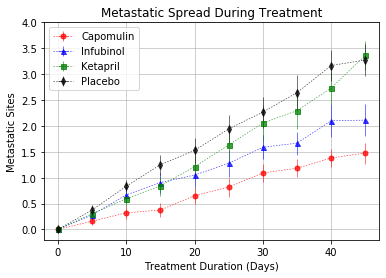

In [14]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 47, 5)
Capomulin = plt.errorbar(x_axis,MSU["Capomulin"], xerr=0, yerr=yerrcap2, color="red", marker="o", markersize=5, label="Capomulin", dashes=[2, 2, 2, 2], alpha =.75, linewidth=.7)
Infubinol = plt.errorbar(x_axis,MSU["Infubinol"], xerr=0, yerr=yerrinf2, color="blue", marker="^", markersize=5, label="Infubinol", dashes=[2, 2, 2, 2], alpha =.75, linewidth=.7)
Ketapril = plt.errorbar(x_axis,MSU["Ketapril"], xerr=0, yerr=yerrket2, color="green", marker="s", markersize=5, label="Ketapril", dashes=[2, 2, 2, 2], alpha =.75, linewidth=.7)
Placebo = plt.errorbar(x_axis,MSU["Placebo"], xerr=0, yerr=yerrpla2, color="black", marker="d", markersize=5, label="Placebo", dashes=[2, 2, 2, 2], alpha =.75, linewidth=.7)
plt.xlim(-2,47)
plt.ylim(-0.2,4)
plt.legend (loc="best")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(alpha=.75)
# Save the Figure
plt.savefig("images/Metastatic_Spread_During_Treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MD=merge.groupby(['Drug','Timepoint']).count()['Mouse ID']
# Convert to DataFrame

# Preview DataFrame
MD.head()


Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Mouse ID, dtype: int64

In [16]:
# Minor Data Munging to Re-Format the Data Frames
MDU=MD.unstack(0)

# Preview the Data Frame
MDU

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [17]:
Capmice=MDU['Capomulin']/25*100
Infmice=MDU['Infubinol']/25*100
Ketmice=MDU['Ketapril']/25*100
Plamice=MDU['Placebo']/25*100

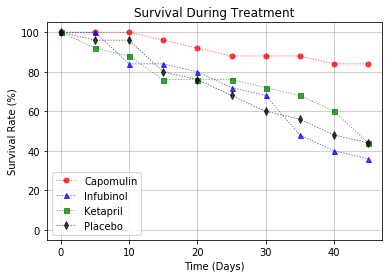

In [18]:
# Generate the Plot (Accounting for percentages)


x_axis = np.arange(0, 47, 5)
Capomulin = plt.plot(x_axis,Capmice, color="red", marker="o", markersize=5, label="Capomulin", dashes=[2, 2, 2, 2], alpha =.75, linewidth=.7)
Infubinol = plt.plot(x_axis,Infmice, color="blue", marker="^", markersize=5, label="Infubinol", dashes=[2, 2, 2, 2], alpha =.75, linewidth=.7)
Ketapril = plt.plot(x_axis,Ketmice, color="green", marker="s", markersize=5, label="Ketapril", dashes=[2, 2, 2, 2], alpha =.75, linewidth=.7)
Placebo = plt.plot(x_axis,Plamice, color="black", marker="d", markersize=5, label="Placebo", dashes=[2, 2, 2, 2], alpha =.75, linewidth=.7)
plt.xlim(-2,47)
plt.ylim(-5,105)
plt.legend (loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(alpha=.75)

# Save the Figure
plt.savefig("images/Survival_During_Treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug

Capchange=(DTU["Capomulin"].min()-DTU["Capomulin"].max())/DTU["Capomulin"].max()
"{:.1%}".format(Capchange.mean())

# Display the data to confirm

# Drugnames=DTU.iloc[0,:]
# Drugnames=Drugnames.index
# Drugnames

'-19.5%'

In [20]:
Infchange=(DTU["Infubinol"].max()-DTU["Infubinol"].min())/DTU["Infubinol"].max()
"{:.1%}".format(Infchange.mean())

'31.6%'

In [21]:
Ketchange=(DTU["Ketapril"].max()-DTU["Ketapril"].min())/DTU["Ketapril"].max()
"{:.1%}".format(Ketchange.mean())
# confused.. my change percentage didn't match yours...

'36.3%'

In [22]:
Plachange=(DTU["Placebo"].max()-DTU["Placebo"].min())/DTU["Placebo"].max()
"{:.1%}".format(Plachange.mean())

'33.9%'

In [23]:
# DTs=DT.reset_index()
# # change=(DTs[0,:].max()-DTs[0,:].min())/DTs[0,:].max()
# # change
# Max=DTs.groupby['Drug'].max()["Tumor Volume (mm3)"]



# # DTS=DTs.groupby(["Drug"]).mean()["Tumor Volume (mm3)"]
# # DTS
# # DTS["max"]=pd.cut(DTs["Drug"],DTs["Drug"].max(),labels=Drugnames)
# # DTS


<BarContainer object of 4 artists>

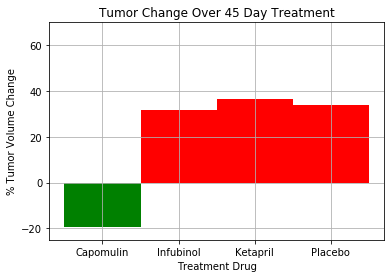

In [24]:
# Store all Relevant Percent Changes into a Tuple
Change_percentages=(Capchange*100,Infchange*100,Ketchange*100,Plachange*100)

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc.
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
x_axis = np.arange(len(drugs))
x_axis

# Use functions to label the percentages of changes
plt.xticks(x_axis, drugs)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Treatment Drug")
plt.ylabel("% Tumor Volume Change")

plt.ylim(-25, 70)
plt.grid(alpha=1)

# Call functions to implement the function calls


plt.bar(x_axis, Change_percentages, color='grrr', alpha=1, width=1)

# for drug in drugs:
#     Change_percentages = change.get_height()
#     plt.text(change.get_x_axis(), yval + .005, yval)

# Save the Figure


# Show the Figure
# fig.show()
# keep going...  I couldn't figure out how to label the bars in this style..

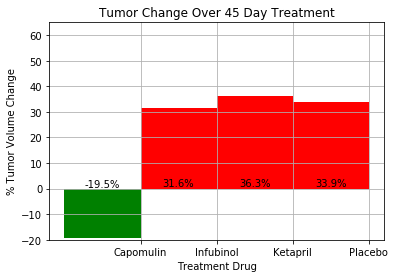

In [25]:
Change_percentages=(Capchange*100,Infchange*100,Ketchange*100,Plachange*100)
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
x_axis = np.arange(len(drugs))
width = 1
fig, ax = plt.subplots()
drugsset=ax.bar(x_axis-width/2,Change_percentages,width,color='grrr', label='Treatment Drug')
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xlabel('Treatment Drug')
ax.set_ylim([-20,65])
ax.set_xticks(x_axis)
ax.set_xticklabels(drugs)
def autolabel(drugsset):
    for drugs in drugsset:
        height = drugs.get_height()/100
        ax.annotate("{:.1%}".format(height),
                    xy=(drugs.get_x() + drugs.get_width() / 2, height),
                    xytext=(0,0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(drugsset)
plt.grid()

In [26]:
fig.savefig("images/Tumor_Change_Over_45_Day_Treatment.png")

In [27]:
fig.show()